## Churn Prediction for Credit Card Customers

<img src="churn.jpeg" alt="Drawing" style="width: 500px;"/>

Customer churn refers to when a customer (payer, subscriber, user, etc.) ceases his or her relationship with a company. Customer retention has become a key area of focus across many industries, especially banking and finance.

In order to succeed at retaining customers who would otherwise abandon the business, marketers and retention experts must be able to (a) predict in advance which customers are going to churn through churn analysis and (b) know which marketing actions will have the greatest retention impact on each particular customer. The ability to predict that a particular customer is at a high risk of churning, while there is still time to do something about it, represents a huge additional potential revenue source for every online business.

### Understanding the data

In order to predict customer churn, it is very important to understand the data available about a customer and how that data can be leveraged.

In [8]:
import pandas as pd

# Reading sample data
sample_data = pd.read_csv('..\\99_sample_data\\customerpreddata.csv')

# Showing sample data
sample_data.head(10)

,AccountNo,Gender,Age,HouseType,ContactAvailability,HomeCountry,CreditScore,CardExpiryDate,TransactionCountry,LargePurchase,Product,TransactionCurrencyCode,date_diff,Card_Age,Week_Segment,TransactionAmount,lag_Datediff,lag_Txamt
0,1308303,Female,56,Owned,Medium,Singapore,1,1908,Singapore,0,1,SGD,0,300,WEEKDAY,12.400,0.0,3.100
1,1308303,Female,56,Owned,Medium,Singapore,1,1908,Singapore,0,1,SGD,0,305,WEEKEND,3.100,5.0,1.240
2,1308303,Female,56,Owned,Medium,Singapore,1,1908,Singapore,0,1,SGD,5,305,WEEKEND,1.240,2.0,6.200
3,1563687,Male,49,Owned,Low,Singapore,1,2003,Singapore,0,1,SGD,0,130,WEEKEND,10.044,256.0,8.680
4,1563687,Male,49,Owned,Low,Singapore,1,2003,Singapore,0,1,SGD,256,386,WEEKDAY,8.680,NaN,NaN
5,7131505,Male,57,Owned,Medium,Singapore,1,2006,Singapore,0,1,SGD,0,59,WEEKDAY,25.420,0.0,25.420
6,7131505,Male,57,Owned,Medium,Singapore,1,2006,Singapore,0,1,SGD,0,59,WEEKDAY,25.420,0.0,25.420
7,7131505,Male,57,Owned,Medium,Singapore,1,2006,Singapore,0,1,SGD,0,59,WEEKDAY,25.420,0.0,17.050
8,7131505,Male,57,Owned,Medium,Singapore,1,2006,Singapore,0,1,SGD,0,59,WEEKDAY,17.050,109.0,4.743
9,7150411,Male,54,Owned,Medium,Singapore,1,2007,Singapore,0,1,SGD,0,93,WEEKEND,9.579,0.0,9.579


The above sample data consists of the following categories of information about a customer :
- Demographic data about a customer
- Product data - About the product the customer owns
- Transaction Data - All customer transactions
- Derived data - Important pieces of information required which is derived from other existing data

### Feature Engineering - Dissecting the most important features

Feature engineering is a step prior to machine learning modeling wherein the most important features are picked for the modeling process. This is done by applying certain algorithms to obtain the important values of the different data points above.

In [70]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

all_data = sample_data

# Convert all data to categorical
all_data = all_data.drop('lag_Txamt',1)
all_data = all_data.dropna(how="any")
all_data['Gender'] = pd.Categorical(all_data.Gender).codes
all_data['ContactAvailability'] = pd.Categorical(all_data.ContactAvailability).codes
all_data['HouseType'] = pd.Categorical(all_data.HouseType).codes
all_data['HomeCountry'] = pd.Categorical(all_data.HomeCountry).codes
all_data['TransactionCountry'] = pd.Categorical(all_data.TransactionCountry).codes
all_data['TransactionCurrencyCode'] = pd.Categorical(all_data.TransactionCurrencyCode).codes
all_data['Week_Segment'] = pd.Categorical(all_data.Week_Segment).codes  
all_data['Product'] = pd.Categorical(all_data.Product).codes  
X = all_data.iloc[0:len(all_data)-1,1:15] # dont consider account no
Y = all_data.iloc[0:len(all_data)-1,16] # lag transaction amount column

Feature ranking:
1. feature 12 (0.654331)
2. feature 11 (0.243905)
3. feature 13 (0.056217)
4. feature 1 (0.020949)
5. feature 0 (0.012260)
6. feature 6 (0.007495)
7. feature 3 (0.004842)


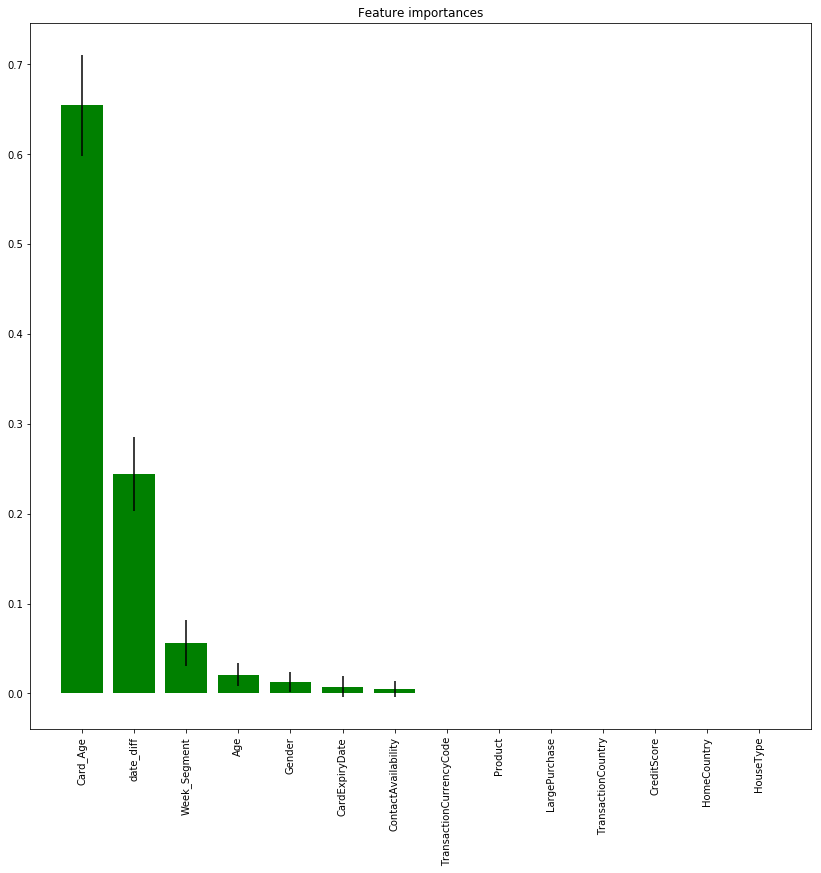

In [71]:
clf_rf_5 = RandomForestClassifier()
clr_rf_5 = clf_rf_5.fit(X,Y)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    if (importances[indices[f]] != 0):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

From the above graph, we can pick up the most important features and assign them weights or remove them from the feature list for machine learning modelling.

### Train a deep learning model

Once we know all the data and the important features required, the next step is to train an appropriate model for prediction. For the training exercise in this case, we choose a deep neural network model to learn from the data and be used to predict possible churn. For this notebook we will be skipping how the model is created, rather focus on using the built model and focus on scoring. 

If you are interested to read more on how the model is built, please visit our blog on : <a href="https://www.justanalytics.com/blog/how-to-retain-customers-by-predicting-and-preventing-churn">How to retain customers by prediction and preventing churn </a>

### Scoring using the trained model

We use the above trained model to predict for a particular customer the amount and the days for the next transaction. In an ideal case this would be done for the next 'n' transactions.

#### Predicting the next transaction amount and days

In [4]:
from keras.models import model_from_json

############################# load json and create model
json_file = open('..\\05_models\\clv_days_dl_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model_days = model_from_json(loaded_model_json)
# load weights into new model
loaded_model_days.load_weights("..\\05_models\\clv_days_dl_model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model_days.compile(loss='binary_crossentropy', optimizer='adam')
#########################

Loaded model from disk


In [11]:
all_data = sample_data
all_data = all_data[all_data['AccountNo']==1308303]

# Convert all data to categorical
all_data = all_data.drop('lag_Txamt',1)
all_data['Gender'] = pd.Categorical(all_data.Gender).codes
all_data['ContactAvailability'] = pd.Categorical(all_data.ContactAvailability).codes
all_data['HouseType'] = pd.Categorical(all_data.HouseType).codes
all_data['HomeCountry'] = pd.Categorical(all_data.HomeCountry).codes
all_data['TransactionCountry'] = pd.Categorical(all_data.TransactionCountry).codes
all_data['TransactionCurrencyCode'] = pd.Categorical(all_data.TransactionCurrencyCode).codes
all_data['Week_Segment'] = pd.Categorical(all_data.Week_Segment).codes  
all_data['Product'] = pd.Categorical(all_data.Product).codes  
X = all_data.iloc[0:len(all_data)-1,1:15] # dont consider account no
Y = all_data.iloc[0:len(all_data)-1,16] # lag transaction amount column

loaded_model_days.fit(X, Y, epochs=100, verbose=0)
Xnew = all_data.tail(1) # dont consider account no
Xnew = Xnew.iloc[:,1:15]
ynew = loaded_model_days.predict(Xnew)
print("Predicted Value (Days) = {}".format(str(abs(ynew[0]))))

Predicted Value (Days) = [0.01014891]


Once we know when the next customer transaction will happen, we can setup some rules in order to determine whether a customer is a churner or not.

In [12]:
# Rules for assessing churn
if (ynew > 150):
    cust_churn = 1
    print('Customer probable of churning.')
else:
    cust_churn = 0
    print('Customer is active.')

Customer is active.


We can similarly do this for all the customers of the organization and understand which bucket of customers are to be dealt with immediately and in the future based on their churn time and clv. This gives us the survival of the customer. 

Using recommendation systems, when we push out recommendations to the customer, we can increase survival and reduce churn, assuming the customer picks up the recommendation given. In order to know more about this please refer to <a href="recommendation_ml.ipynb">Recommendation IPython Notebook.</a>

### Conclusion

Customer churn is very important to know in order to retain customer and know how much it is going to cost to keep a customer on board. Marketing efforts can be directed based on this. The more information we have about a customer, the better we are able to predict. Hence, models keep getting better over time, as and when more information about a customer is available.